In [1]:
import glob
import re

from matplotlib import pyplot as plt
from math import sqrt
from utils import Graph
import numpy as np

def hit_check(x, y, z):
    h = x * 1e-6
    r = sqrt(y**2 + z**2) * 1e-6
    
    if (h - 3.5e-3)**2 + r**2 <= 1e-12:
        return True
    
    if h <= 3.5e-3 and h <= (3e-3 - 3.5e-3) / (1e-4 - 1e-6) * (r - 1e-4) + 3e-3:
        return True
    
    return False

The below imports and processes all files used in GAr amplification. The LUT used is a $20$ $\mu$m $\times$ $20$ $\mu$m $\times$ $20$ $\mu$m volume surrounding a $3.5$ mm high, $1$ $\mu$m radius tip. If an electron leaves the simulation (it doesn't land somewhere on the tip), we throw it out.

In [2]:
folder_list = [10, 13, 17, 23, 30, 40, 53, 70, 93, 123, 162, 214, 283, 375, 496, 655, 866, 1145, 1513, 2000]
pressure_list = [2, 7, 15]
v_per_cm = [[], [], []]
mult_factor = [[], [], []]

for i, p in enumerate(pressure_list):
    for folder in folder_list:
        file_tree = {}

        for file in glob.glob(f'gar-amplification/{p}/{folder}/*.txt'):
            key = int(re.search(r'(\d*)(?:V)', file).group(1))
            if (key in file_tree):
                file_tree[key].append(file)
            else:
                file_tree[key] = [file]

        for key, value in sorted(file_tree.items()):
            group = Graph(value, smooth=False)

            end_x = [k[-1] for k in group.x]
            end_y = [k[-1] for k in group.y]
            end_z = [k[-1] for k in group.z]

            ionization_list = []
            
            for k in range(group.n):
                if hit_check(end_x[k], end_y[k], end_z[k]):
                    ionization_list.append(group.ionized[k][-1])
            
            multiplication_factor = 2**np.mean(ionization_list)

            v_per_cm[i].append(key)
            mult_factor[i].append(multiplication_factor)

The cell below plots the processed data. The red line shows real world data taken from D. Caratelli's slides from https://kicp-workshops.uchicago.edu/2018-CEvNS/presentations.php.

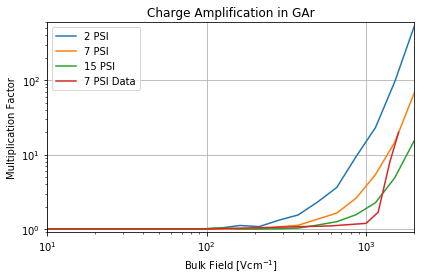

In [17]:
# plt.rcParams['font.size'] = 14
# plt.rcParams['font.family'] = 'serif'
# fig = plt.figure(figsize=(12, 6))

# plt.rcParams['font.size'] = 20
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = ['Arial']
# fig = plt.figure(figsize=(8, 8))

for i, p in enumerate(pressure_list):
    plt.plot(v_per_cm[i], mult_factor[i], label=f'{p} PSI')
    
plt.plot([1, 1e2, 6e2, 1e3, 1.19e3, 1.41e3, 1.6e3], [1, 1, 1.1, 1.19, 1.68, 8, 20], label='7 PSI Data')

plt.title('Charge Amplification in GAr') # with $1$ $\mu$m Radius Tip
plt.xlabel("Bulk Field [Vcm$^{-1}$]")
plt.ylabel("Multiplication Factor")

plt.xscale('log')
plt.yscale('log')

plt.xlim(1e1, 2e3)
plt.ylim(0.9, 6e2)

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()    

# plt.savefig('gar_charge_amp.pdf', bbox_inches='tight')